In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [3]:
resnet_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [4]:
for layer in resnet_model.layers:
  layer.trainable = False

In [5]:
def get_model(resnet_model):
  x = resnet_model.output
  x = Dense(1024, activation = 'relu')(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(1,  activation = 'sigmoid')(x)
  model = Model(inputs=resnet_model.input, outputs=x)
  return model

# image(input) -> padding ->  convolution -> pooling -> output

In [6]:
model = get_model(resnet_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(0.001), metrics=['accuracy'], loss='binary_crossentropy')

#  accuracy - up
#  loss - down

In [8]:
train_df, test_df = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset',
    image_size = (244, 244),
    validation_split = 0.2,
    subset = 'both',
    seed = 42
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Using 50 files for validation.


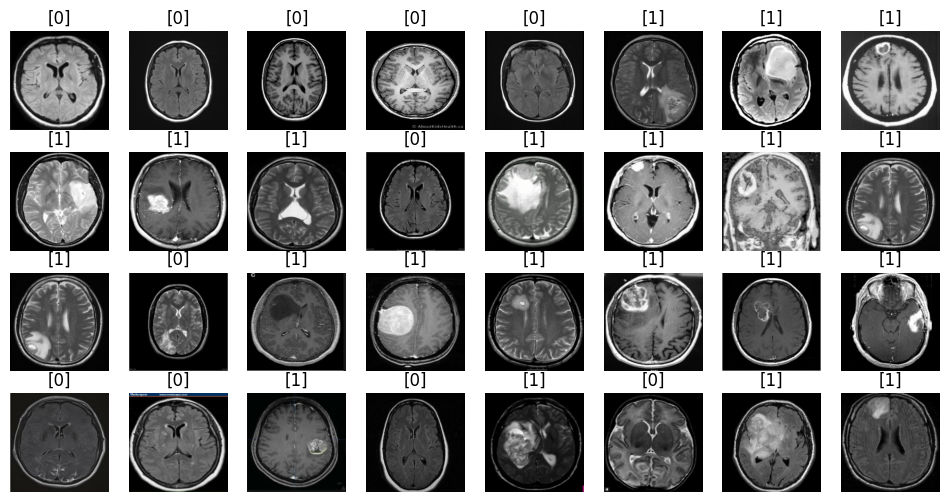

In [9]:
import matplotlib.pyplot as plt
for images, labels in train_df.take(1):
    # Display the images
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
        ax.set_title(str([labels[i].numpy()]))

In [10]:
batch = train_df.take(1)

for x,  y in batch:
  print(x.numpy().shape)
  print(y.numpy().shape)

(32, 244, 244, 3)
(32,)


In [11]:
history = model.fit(train_df, epochs=5, validation_data = test_df)

Epoch 1/5
7/7 [==============================] - 20s 1s/step - loss: 4.2054 - accuracy: 0.4335 - val_loss: 1.0146 - val_accuracy: 0.6800
Epoch 2/5
7/7 [==============================] - 1s 162ms/step - loss: 0.7921 - accuracy: 0.7143 - val_loss: 0.6372 - val_accuracy: 0.6600
Epoch 3/5
7/7 [==============================] - 2s 228ms/step - loss: 0.4029 - accuracy: 0.8227 - val_loss: 0.6533 - val_accuracy: 0.7200
Epoch 4/5
7/7 [==============================] - 2s 227ms/step - loss: 0.3585 - accuracy: 0.8571 - val_loss: 0.3425 - val_accuracy: 0.8600
Epoch 5/5
7/7 [==============================] - 2s 230ms/step - loss: 0.2813 - accuracy: 0.8719 - val_loss: 0.3205 - val_accuracy: 0.8800


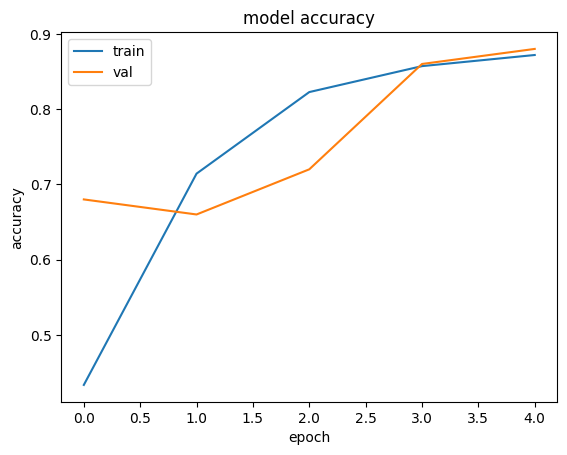

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

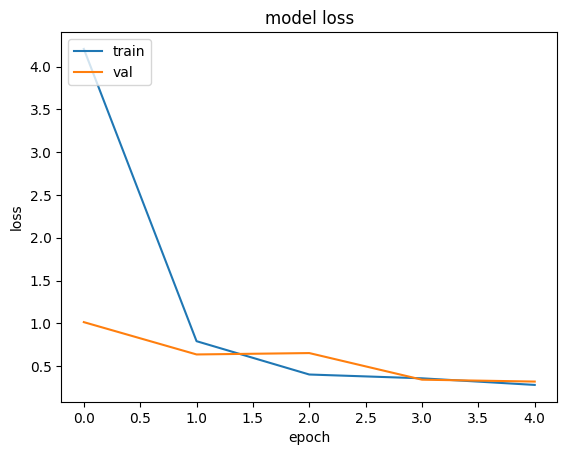

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
img = keras.utils.load_img(
    '/content/drive/MyDrive/brain_tumor_dataset/no/19 no.jpg',
    target_size = (244, 244) #244 x 244, 1920X1080  -> 244 x 244
)
img2 = keras.utils.load_img(
    '/content/drive/MyDrive/brain_tumor_dataset/yes/Y106.jpg',
    target_size = (244, 244)
)

In [15]:
arr1 = keras.utils.img_to_array(img)
arr2 = keras.utils.img_to_array(img2)

arr1 = np.array([arr1])
arr2 = np.array([arr2])

test_input = np.vstack([arr1, arr2])
test_input.shape

(2, 244, 244, 3)

In [16]:
predictions = model.predict(test_input)
predictions

1/1 [==============================] - 1s 1s/step


array([[0.01224236],
       [0.98902136]], dtype=float32)

In [17]:
for prediction in predictions:
  if prediction > 0.5:
    print('yes')
  if prediction <= 0.5:
    print('no')

no
yes


In [18]:
# model.save('/content/mymodel.keras')

In [19]:
# imported = keras.models.load_model('/content/mymodel.keras')

In [21]:
pred =  model.predict(arr1)
#  .predict is a function of Model class
pred[0][0]

1/1 [==============================] - 0s 32ms/step


0.012242365

In [24]:
# 0 - closer = no
# 1 - closer = yes

In [ ]:
# -> lib import -> resnet import -> layers add kri -> cnn model -> dataset import ->model complie and train -> evaluation/graphs
# -> images import -> predict